In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import Data
crime_data=pd.read_csv('merged_jan2010_Jul2023.csv', dtype={'Beat': str, 'ZIP Code': str, 'Offense Count': float, 'Incident': float})

In [3]:
crime_data.shape

(2307150, 17)

In [5]:
crime_data.head()

,Occurrence Date,Occurrence Hour,NIBRS Description,Offense Count,Beat,Premise,Block Range,Street Name,Street Type,Suffix,Incident,NIBRS Class,City,ZIP Code,Street No,MapLongitude,MapLatitude
0,2010-01-01 00:00:00,8.0,Theft,1.0,3B10,20R,4900-4999,POINCIANA,DR,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-01 00:00:00,18.0,Theft,1.0,5F20,20D,8700-8799,HAMMERLY,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-01 00:00:00,0.0,Burglary,1.0,1A10,05O,400-499,MAIN,ST,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-01 00:00:00,0.0,Theft,1.0,7C10,20R,1900-1999,LOCKWOOD,DR,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-01 00:00:00,10.0,Theft,1.0,18F20,18A,3300-3399,MCCUE,RD,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2307150 entries, 0 to 2307149
Data columns (total 17 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Occurrence Date    object 
 1   Occurrence Hour    object 
 2   NIBRS Description  object 
 3   Offense Count      float64
 4   Beat               object 
 5   Premise            object 
 6   Block Range        object 
 7   Street Name        object 
 8   Street Type        object 
 9   Suffix             object 
 10  Incident           float64
 11  NIBRS Class        object 
 12  City               object 
 13  ZIP Code           object 
 14  Street No          object 
 15  MapLongitude       float64
 16  MapLatitude        float64
dtypes: float64(4), object(13)
memory usage: 299.2+ MB


In [6]:
crime_data['Occurrence Date']= pd.to_datetime(crime_data['Occurrence Date'],format='mixed')

In [8]:
crime_data['NIBRS DescriptionOrg']=crime_data['NIBRS Description']

In [9]:
# removing white spaces
crime_data['NIBRS Description']=crime_data['NIBRS Description'].map(lambda x: x.strip())

In [10]:
crime_data['NIBRS Description'].unique()

array(['Theft', 'Burglary', 'Robbery', 'Auto Theft', 'Aggravated Assault',
       'Rape', 'Murder', '1', 'AutoTheft', 'Simple assault',
       'All other offenses', 'Destruction, damage, vandalism',
       'Shoplifting', 'Motor vehicle theft', 'Theft from building',
       'Theft from motor vehicle', 'Burglary, Breaking and Entering',
       'False pretenses, swindle', 'Intimidation', 'Purse-snatching',
       'All other larceny', 'Theft of motor vehicle parts or accessory',
       'Weapon law violations', 'Drug, narcotic violations',
       'Trespass of real property', 'Pocket-picking',
       'Counterfeiting, forgery', 'Identify theft',
       'Credit card, ATM fraud', 'Animal Cruelty',
       'Family offenses, no violence', 'Driving under the influence',
       'Impersonation', 'Bad checks', 'Statutory rape', 'Forcible rape',
       'Disorderly conduct', 'Drug equipment violations',
       'Stolen property offenses', 'Drunkenness', 'Prostitution',
       'Extortion, Blackmail', 'Hum

In [46]:
# replacing description categories accoring to NIBRS description
crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('False pretenses, swindle','False Pretenses/Swindle/Confidence Game')        
crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('Burglary, Breaking and Entering','Burglary/Breaking & Entering')         
crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('Pornographs, obscene material','Pornography/Obscene Material')
crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('Destruction, damage, vandalism','Destruction/Damage/Vandalism of Property')           
crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('Drug, narcotic violations','Drug/Narcotic Violations')
crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('Counterfeiting, forgery','Counterfeiting/Forgery')

crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('Identify theft','Burglary/Breaking & Entering')

crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('Family offenses, no violence','Family Offenses/Nonviolent')
crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('Human Trafficking/Commercial Sex Act','Assisting or promoting prostitution')


crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('Kidnapping, Abduction','Kidnapping/Abduction')
crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('Curfew, loitering, vagrancy violations','Curfew/Loitering/Vagrancy Violations')
crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('Kidnapping, abduction','Kidnapping/Abduction')
crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('Murder, non-negligent', 'Murder & nonnegligent manslaughter')

crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('Extortion, Blackmail','Extortion/Blackmail')
crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('Counterfeiting, forgery','Counterfeiting/Forgery')
crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('Credit card, ATM fraud','Credit Card/ATM Fraud')
crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('Theft','Theft/All other Larceny')
crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('Auto Theft','Theft from motor vehicle')
crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('Murder', 'Murder & nonnegligent manslaughter')

crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('1','Unknown')
crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('Rape','Forcible rape')
crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('AutoTheft','Theft from motor vehicle')
crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('From coin-operated machine or device','Theft from coin-operated machine or device')
crime_data['NIBRS Description']=crime_data['NIBRS Description'].replace('Promoting gambling','Operating/Promoting/Assisting Gambling')

In [47]:
crime_data['NIBRS Description'].unique()

array(['Theft/All other Larceny', 'Burglary', 'Robbery',
       'Theft from motor vehicle', 'Aggravated Assault', 'Forcible rape',
       'Murder & nonnegligent manslaughter', 'Unkonwn', 'Simple assault',
       'All other offenses', 'Destruction/Damage/Vandalism of Property',
       'Shoplifting', 'Motor vehicle theft', 'Theft from building',
       'Burglary/Breaking & Entering',
       'False Pretenses/Swindle/Confidence Game', 'Intimidation',
       'Purse-snatching', 'All other larceny',
       'Theft of motor vehicle parts or accessory',
       'Weapon law violations', 'Drug/Narcotic Violations',
       'Trespass of real property', 'Pocket-picking',
       'Counterfeiting/Forgery', 'Credit Card/ATM Fraud',
       'Animal Cruelty', 'Family Offenses/Nonviolent',
       'Driving under the influence', 'Impersonation', 'Bad checks',
       'Statutory rape', 'Disorderly conduct',
       'Drug equipment violations', 'Stolen property offenses',
       'Drunkenness', 'Prostitution', 'Exto

In [48]:
# reading the offensecode provied in material
offense_code=pd.read_csv("offense_codenew.csv")
offense_code.head()

,Offense Code,Offense Description,Crime Against,NIBRS Offenses
0,13A,Aggravated Assault,Person,Assault Offenses
1,23H,Theft/All other Larceny,Property,Larceny/Theft Offenses
2,90Z,All other offenses,Person/Property/Society,All Other Offenses
3,200,Arson,Property,Arson
4,40B,Assisting or promoting prostitution,Society,Prostitution Offenses


In [49]:
offense_code.tail()

,Offense Code,Offense Description,Crime Against,NIBRS Offenses
66,26G,Hacking /Computer Invasion,Property/Person/Society,Extortion/Blackmail
67,23F,Theft From motor vehicle,Property,Larceny/Theft Offenses
68,23H,All other larceny,Property,Larceny/Theft Offenses
69,23F,Theft from motor vehicle,Property,Larceny/Theft Offenses
70,Unknown,Unkonwn,Unknown,Unknown


In [50]:
# removing white spaces from column names
offense_code.columns=offense_code.columns.map(lambda x: x.strip())
offense_code.head()

,Offense Code,Offense Description,Crime Against,NIBRS Offenses
0,13A,Aggravated Assault,Person,Assault Offenses
1,23H,Theft/All other Larceny,Property,Larceny/Theft Offenses
2,90Z,All other offenses,Person/Property/Society,All Other Offenses
3,200,Arson,Property,Arson
4,40B,Assisting or promoting prostitution,Society,Prostitution Offenses


In [51]:
#replacing column name according to crime data 
offense_code.rename(columns={"Offense Description":"NIBRS Description"},inplace=True)
offense_code.rename(columns={"NIBRS Offenses":"Offense Category"},inplace=True)
offense_code.columns

Index(['Offense Code', 'NIBRS Description', 'Crime Against',
       'Offense Category'],
      dtype='object')

In [52]:
# removing white spaces from NIBRS description
offense_code['NIBRS Description']=offense_code['NIBRS Description'].map(lambda x: str(x).strip())

In [53]:
offense_code['NIBRS Description'].unique()

array(['Aggravated Assault', 'Theft/All other Larceny',
       'All other offenses', 'Arson',
       'Assisting or promoting prostitution', 'Bad checks',
       'Betting/wagering', 'Bribery', 'Burglary/Breaking & Entering',
       'Counterfeiting/Forgery', 'Credit Card/ATM Fraud',
       'Curfew/Loitering/Vagrancy Violations',
       'Destruction/Damage/Vandalism of Property', 'Disorderly conduct',
       'Driving under the influence', 'Drug equipment violations',
       'Drug/Narcotic Violations', 'Drunkenness', 'Embezzlement',
       'Extortion/Blackmail', 'False Pretenses/Swindle/Confidence Game',
       'Family Offenses/Nonviolent', 'Forcible fondling', 'Forcible rape',
       'Forcible sodomy', 'Gambling equipment violations',
       'Impersonation', 'Incest', 'Intimidation', 'Justifiable homicide',
       'Kidnapping/Abduction', 'Liquor law violations',
       'Motor vehicle theft', 'Murder & nonnegligent manslaughter',
       'Negligent manslaughter', 'Operating/Promoting/Assist

In [54]:
Cdata = pd.merge(crime_data, offense_code,how="left", on='NIBRS Description')

In [55]:
Cdata.columns

Index(['Occurrence Date', 'Occurrence Hour', 'NIBRS Description',
       'Offense Count', 'Beat', 'Premise', 'Block Range', 'Street Name',
       'Street Type', 'Suffix', 'Incident', 'NIBRS Class', 'City', 'ZIP Code',
       'Street No', 'MapLongitude', 'MapLatitude', 'NIBRS DescriptionOrg',
       'Offense Code', 'Crime Against', 'Offense Category'],
      dtype='object')

In [56]:
Cdata.isnull().mean()*100

Occurrence Date          0.000000
Occurrence Hour          0.000000
NIBRS Description        0.000000
Offense Count            0.446872
Beat                     0.041176
Premise                  1.453438
Block Range             28.039183
Street Name              0.000043
Street Type              4.215201
Suffix                  46.510067
Incident                51.830830
NIBRS Class             51.830830
City                    51.830830
ZIP Code                52.416921
Street No               72.155473
MapLongitude            83.002969
MapLatitude             83.002969
NIBRS DescriptionOrg     0.000000
Offense Code             0.000000
Crime Against            0.000000
Offense Category         0.000000
dtype: float64

In [45]:
Cdata['NIBRS Description'][Cdata['Offense Code'].isnull()].unique()

array(['Unkonwn'], dtype=object)

In [57]:
#remove unneccessary columns
Cdata.drop(["NIBRS Description","Suffix",'NIBRS Class','Incident','NIBRS Class','City','ZIP Code','Street No',
           'MapLongitude','MapLatitude'],inplace=True,axis=1)


In [58]:
Cdata.head()

,Occurrence Date,Occurrence Hour,Offense Count,Beat,Premise,Block Range,Street Name,Street Type,NIBRS DescriptionOrg,Offense Code,Crime Against,Offense Category
0,2010-01-01,8.0,1.0,3B10,20R,4900-4999,POINCIANA,DR,Theft,23H,Property,Larceny/Theft Offenses
1,2010-01-01,18.0,1.0,5F20,20D,8700-8799,HAMMERLY,-,Theft,23H,Property,Larceny/Theft Offenses
2,2010-01-01,0.0,1.0,1A10,05O,400-499,MAIN,ST,Burglary,220,Property,Burglary/B&E
3,2010-01-01,0.0,1.0,7C10,20R,1900-1999,LOCKWOOD,DR,Theft,23H,Property,Larceny/Theft Offenses
4,2010-01-01,10.0,1.0,18F20,18A,3300-3399,MCCUE,RD,Theft,23H,Property,Larceny/Theft Offenses


In [59]:
Cdata["Street Type"].unique()

array(['DR', '-', 'ST', 'RD', 'FWY', 'LN', 'FWY SER', 'CT', 'AVE', 'BLVD',
       'SER', 'CIR', 'PKWY', 'TRL', 'WAY', 'HWY', 'PL', 'LP', 'BYP',
       'PASS', 'GRN', 'VIEW', 'RAMP', 'BND', 'PATH', 'WALK', 'BLVD ',
       'COVE', 'SQ', 'UTRN', 'MNR', 'PRK', 'TER', 'RD   ', 'RDG', 'PT',
       'ST   ', 'DR   ', 'PKWY ', 'FWY  ', 'AVE  ', 'CIR  ', 'LN   ',
       'WAY  ', 'CT   ', 'TRL  ', 'HWY  ', 'PATH ', 'PL   ', 'LP   ',
       'COVE ', 'PASS ', 'SPUR', 'XING', nan, 'VW', 'TRCE'], dtype=object)

In [60]:
Cdata["Street Type"]=Cdata["Street Type"].replace('-', 'Unknown')

In [61]:
Cdata["Street Type"]=Cdata["Street Type"].fillna('Unknown')

In [62]:
Cdata["Street Type"]=Cdata["Street Type"].map(lambda x:x.strip())

In [63]:
missing_data = pd.DataFrame(Cdata.isnull().mean()*100, columns=["Missing Values %"])
missing_data

,Missing Values %
Occurrence Date,0.000000
Occurrence Hour,0.000000
Offense Count,0.446872
Beat,0.041176
Premise,1.453438
Block Range,28.039183
Street Name,0.000043
Street Type,0.000000
NIBRS DescriptionOrg,0.000000
Offense Code,0.000000


In [64]:
#we can also drop Block Range
Cdata.drop(["Block Range"],inplace=True,axis=1)

In [73]:
Cdata.rename(columns = {'Occurrence Date':'Date'}, inplace = True)

In [101]:
Cdata.head(2)

,Date,Occurrence Hour,Offense Count,Beat,Premise,Street Name,Street Type,NIBRS DescriptionOrg,Offense Code,Crime Against,Offense Category
0,2010-01-01,8.0,1.0,3B10,20R,POINCIANA,DR,Theft,23H,Property,Larceny/Theft Offenses
1,2010-01-01,18.0,1.0,5F20,20D,HAMMERLY,Unknown,Theft,23H,Property,Larceny/Theft Offenses


In [74]:
Cdata['Date']= pd.to_datetime(Cdata['Date'],format='mixed')

### treating missing values

In [100]:
#Offense Count	0.446872
Cdata["Offense Count"]=Cdata["Offense Count"].fillna(0)
Cdata['Offense Count'].isnull().sum()

0

In [106]:
#Beat	0.041176
Cdata["Beat"]=Cdata['Beat'].fillna('unknown')
Cdata['Beat'].isnull().sum()

0

In [107]:
#Premise	1.453438
Cdata['Premise']=Cdata['Premise'].fillna('unknown')
Cdata['Premise'].isnull().sum()

0

In [109]:
#Street Name	0.000043
Cdata['Street Name']=Cdata['Street Name'].fillna('unknown')
Cdata['Street Name'].isnull().sum()

0

In [110]:
Cdata.isnull().mean()*100

Date                    0.0
Occurrence Hour         0.0
Offense Count           0.0
Beat                    0.0
Premise                 0.0
Street Name             0.0
Street Type             0.0
NIBRS DescriptionOrg    0.0
Offense Code            0.0
Crime Against           0.0
Offense Category        0.0
dtype: float64

## Weather Data Cleaning

In [271]:
weather_data=pd.read_csv('cleaned_weather.csv') 

In [272]:
weather_data.head(2)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Houston,TX",2010-01-01,53.9,41.3,46.9,53.9,33.0,42.3,34.0,63.0,...,174.8,15.0,7.0,2010-01-01 07:16:59,2010-01-01 17:33:24,0.53,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,7224301..."
1,"Houston,TX",2010-02-01,53.7,40.1,46.3,53.7,34.9,43.1,30.9,56.9,...,156.6,13.4,6.0,2010-01-02 07:17:13,2010-01-02 17:34:07,0.57,Clear,Clear conditions throughout the day.,clear-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,7224301..."


In [273]:
# no need of name column
weather_data.drop('name',axis=1,inplace=True)

In [274]:
# no need of name column
weather_data.drop(['icon','stations'],axis=1,inplace=True)

In [275]:
# changing name for dattime so that we can merge with common column
weather_data.rename(columns = {'datetime':'Date'}, inplace = True)

In [277]:
# changing date type from object to datetime
weather_data['Date']= pd.to_datetime(weather_data['Date'],format='mixed')

In [278]:
weather_data.describe()

,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
count,4991,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,...,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4626.000000,4626.000000,4626.000000,4991.000000
mean,2016-10-31 00:00:00,80.154859,64.256021,71.393829,82.549449,63.634662,72.608856,59.667381,69.757283,0.092281,...,22.912022,14.980425,159.090603,1016.117952,45.650571,8.636085,170.791548,14.733744,6.425205,0.483041
min,2010-01-01 00:00:00,25.300000,12.500000,18.500000,11.800000,-4.300000,3.700000,0.000000,18.100000,0.000000,...,0.000000,0.900000,0.000000,999.400000,0.000000,0.800000,8.500000,0.500000,0.000000,0.000000
25%,2013-06-01 12:00:00,71.850000,54.900000,63.200000,71.850000,54.900000,63.100000,50.300000,62.700000,0.000000,...,19.400000,11.600000,90.900000,1012.800000,21.300000,7.900000,101.350000,8.800000,5.000000,0.250000
50%,2016-10-31 00:00:00,82.100000,67.200000,73.800000,83.100000,67.200000,73.900000,64.700000,71.300000,0.000000,...,23.000000,14.500000,152.200000,1015.400000,39.900000,9.300000,168.100000,14.500000,7.000000,0.500000
75%,2020-03-31 12:00:00,91.000000,75.500000,82.150000,96.600000,75.500000,85.000000,71.900000,79.600000,0.017500,...,28.200000,17.700000,202.300000,1018.900000,70.900000,9.800000,235.600000,20.300000,9.000000,0.750000
max,2023-08-31 00:00:00,110.500000,84.300000,93.800000,116.100000,93.000000,99.900000,77.700000,99.600000,15.537000,...,83.900000,40.900000,359.900000,1038.600000,100.000000,9.900000,691.300000,59.800000,10.000000,0.980000
std,NaN,13.431522,13.208290,12.696262,16.211105,15.649461,15.444204,14.754456,14.096193,0.402909,...,9.472626,4.800610,95.434243,5.220453,29.737025,1.541553,87.377593,7.555122,2.559840,0.288668


In [279]:
# libraries to plot boxplot for outlier and other stuff
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Moonphase: when the Moon is high in the sky, it creates 'bulges' in Earth's atmosphere that cause a slight change in precipitation levels. The higher air pressure created by each oscillation leads to an increase in temperature, and because warmer air can hold more moisture, that means less chance of rain

At New Moon the percent illuminated is 0; at First and Last Quarters it is 50%; and at Full Moon it is 100%. During the crescent phases the percent illuminated is between 0 and 50% and during gibbous phases it is between 50% and 100%.

In [280]:
weather_data.isnull().mean()*100

Date                0.000000
tempmax             0.000000
tempmin             0.000000
temp                0.000000
feelslikemax        0.000000
feelslikemin        0.000000
feelslike           0.000000
dew                 0.000000
humidity            0.000000
precip              0.000000
precipprob          0.000000
precipcover         0.000000
preciptype          0.000000
snow                0.000000
snowdepth           0.000000
windgust            0.000000
windspeed           0.000000
winddir             0.000000
sealevelpressure    0.000000
cloudcover          0.000000
visibility          0.000000
solarradiation      7.313164
solarenergy         7.313164
uvindex             7.313164
sunrise             0.000000
sunset              0.000000
moonphase           0.000000
conditions          0.000000
description         0.000000
dtype: float64

In [281]:
weather_data.loc[weather_data['uvindex'].isnull()]

,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description
1461,2014-01-01,65.0,46.6,55.9,65.0,43.8,55.5,49.5,79.4,0.000,...,93.7,8.8,NaN,NaN,NaN,2014-01-01 07:16:59,2014-01-01 17:33:25,0.00,Overcast,Cloudy skies throughout the day.
1462,2014-01-02,59.0,39.4,47.6,59.0,29.7,42.4,31.2,55.8,0.002,...,27.3,9.3,NaN,NaN,NaN,2014-01-02 07:17:12,2014-01-02 17:34:08,0.04,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...
1463,2014-01-03,53.4,33.8,42.7,53.4,26.7,38.0,25.3,52.0,0.000,...,4.1,9.9,NaN,NaN,NaN,2014-01-03 07:17:24,2014-01-03 17:34:52,0.08,Clear,Clear conditions throughout the day.
1464,2014-01-04,65.2,41.6,56.5,65.2,35.5,54.6,48.0,73.7,0.000,...,58.2,9.9,NaN,NaN,NaN,2014-01-04 07:17:35,2014-01-04 17:35:37,0.11,Partially cloudy,Partly cloudy throughout the day.
1465,2014-01-05,64.5,36.5,51.9,64.5,25.4,47.2,40.0,65.6,0.036,...,61.1,9.4,NaN,NaN,NaN,2014-01-05 07:17:43,2014-01-05 17:36:22,0.15,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2014-12-27,73.6,46.6,61.5,73.6,39.2,60.0,59.4,92.7,0.021,...,99.7,8.7,NaN,NaN,NaN,2014-12-27 07:15:23,2014-12-27 17:29:56,0.20,"Rain, Overcast",Cloudy skies throughout the day with rain.
1822,2014-12-28,45.6,40.0,41.9,41.3,32.7,36.6,39.9,92.5,0.132,...,97.1,6.3,NaN,NaN,NaN,2014-12-28 07:15:45,2014-12-28 17:30:34,0.25,"Rain, Overcast",Cloudy skies throughout the day with a chance ...
1823,2014-12-29,49.1,39.4,44.4,48.9,35.2,42.7,42.8,93.8,0.000,...,99.9,2.7,NaN,NaN,NaN,2014-12-29 07:16:05,2014-12-29 17:31:13,0.27,Overcast,Cloudy skies throughout the day.
1824,2014-12-30,53.4,40.0,48.2,53.4,32.4,45.2,42.7,81.8,0.000,...,89.0,9.2,NaN,NaN,NaN,2014-12-30 07:16:23,2014-12-30 17:31:53,0.31,Partially cloudy,Partly cloudy throughout the day.


In [ ]:
### its indeed that 2014 data is not available for solar radiation,solarenergy,uv index
### we tried to fill it with median values

In [282]:
weather_data["solarradiation"]=weather_data["solarradiation"].fillna(weather_data["solarradiation"].median())
weather_data['solarradiation'].isnull().sum()

0

In [283]:
weather_data['uvindex']=weather_data["uvindex"].fillna(weather_data["uvindex"].median())
weather_data["uvindex"].isnull().sum()

0

In [284]:
weather_data["solarenergy"]=weather_data["solarenergy"].fillna(weather_data["solarenergy"].median())
weather_data["solarenergy"].isnull().sum()

0

In [285]:
weather_data.isnull().mean()*100

Date                0.0
tempmax             0.0
tempmin             0.0
temp                0.0
feelslikemax        0.0
feelslikemin        0.0
feelslike           0.0
dew                 0.0
humidity            0.0
precip              0.0
precipprob          0.0
precipcover         0.0
preciptype          0.0
snow                0.0
snowdepth           0.0
windgust            0.0
windspeed           0.0
winddir             0.0
sealevelpressure    0.0
cloudcover          0.0
visibility          0.0
solarradiation      0.0
solarenergy         0.0
uvindex             0.0
sunrise             0.0
sunset              0.0
moonphase           0.0
conditions          0.0
description         0.0
dtype: float64

In [286]:
weather_data['snowdepth'].unique()

array([0. , 0.1, 0.7, 2.3, 0.2])

In [287]:
weather_data['snow'].unique()

array([0. , 0.2])

In [288]:
weather_data['precip'].nunique()

588

In [120]:
weather_data['precipprob' ].unique()

array([  0, 100], dtype=int64)

In [289]:
weather_data['precipcover' ].unique()

array([  0.  ,  20.83,   4.17,  58.33,  41.67,  29.17,  16.67,   8.33,
        33.33,  50.  ,  75.  ,  12.5 ,  25.  ,  45.83,  70.83,  91.67,
        83.33,  37.5 , 100.  ,  62.5 ,  54.17,  66.67,  79.17,  87.5 ,
        95.83])

In [290]:
weather_data['preciptype' ].unique() # we can remove this column

array(['none', 'rain', 'rain,snow', 'snow'], dtype=object)

In [291]:
weather_data['conditions'].unique()

array(['Partially cloudy', 'Clear', 'Rain, Partially cloudy',
       'Rain, Overcast', 'Snow, Rain', 'Rain', 'Overcast',
       'Snow, Rain, Partially cloudy', 'Snow, Rain, Overcast',
       'Snow, Partially cloudy'], dtype=object)

In [292]:
weather_data['description'].nunique() # we can remove this column

55

In [293]:
## remove snow,precipprob,description column
weather_data.drop(['snow','precipprob','description'],inplace=True,axis=1)

In [294]:
weather_data.columns


Index(['Date', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipcover', 'preciptype',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'sunrise', 'sunset', 'moonphase', 'conditions'],
      dtype='object')

In [308]:
## calculating daylight length

sunrise = pd.to_datetime(weather_data['sunrise'])
sunset = pd.to_datetime(weather_data['sunset'])
weather_data['daylength'] = (sunset - sunrise)
weather_data['daylength']=[x[6:] for x in weather_data['daylength'].astype(str)]
weather_data['hour']=[x[:3] for x in weather_data['daylength']]
weather_data['hour']=[int(x) for x in weather_data['hour']]

weather_data['min']=[x[4:6] for x in weather_data['daylength']]
weather_data['min']=[int(x)/60 for x in weather_data['min']]

weather_data['sec']=[x[7:10] for x in weather_data['daylength']]
weather_data['sec']=[int(x)/3600 for x in weather_data['sec']]


In [309]:
weather_data['Daylight(hr)']= weather_data[['hour','min','sec']].sum(axis=1)

In [310]:
weather_data.head(2)

,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,uvindex,sunrise,sunset,moonphase,conditions,daylength,hour,min,sec,Daylight(hr)
0,2010-01-01,53.9,41.3,46.9,53.9,33.0,42.3,34.0,63.0,0.0,...,7.0,2010-01-01 07:16:59,2010-01-01 17:33:24,0.53,Partially cloudy,10:16:25,10,0.266667,0.006944,10.273611
1,2010-02-01,53.7,40.1,46.3,53.7,34.9,43.1,30.9,56.9,0.0,...,6.0,2010-01-02 07:17:13,2010-01-02 17:34:07,0.57,Clear,10:16:54,10,0.266667,0.015000,10.281667


In [267]:
weather_data.columns

Index(['Date', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipcover', 'preciptype',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'sunrise', 'sunset', 'moonphase', 'conditions', 'daylength', 'hour',
       'min', 'sec', 'Daylight(sec)', 'Daylight(hr)'],
      dtype='object')

In [311]:
weather_data.drop(['daylength','hour','min','sec','sunrise','sunset'],inplace=True,axis=1)

In [312]:
weather_data.head(2)

,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,conditions,Daylight(hr)
0,2010-01-01,53.9,41.3,46.9,53.9,33.0,42.3,34.0,63.0,0.0,...,359.3,1028.0,47.7,9.8,174.8,15.0,7.0,0.53,Partially cloudy,10.273611
1,2010-02-01,53.7,40.1,46.3,53.7,34.9,43.1,30.9,56.9,0.0,...,93.7,1025.9,9.1,9.6,156.6,13.4,6.0,0.57,Clear,10.281667


In [218]:
df=weather_data[['temp','humidity', 'windspeed', 'sealevelpressure', 'solarradiation', 'solarenergy', 'uvindex','moonphase']]

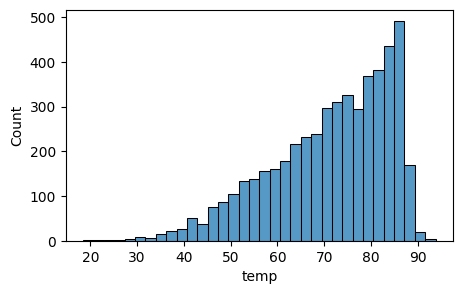

In [224]:
plt.close()
plt.figure(figsize=(5,3))
sns.histplot(df.temp)
plt.show()

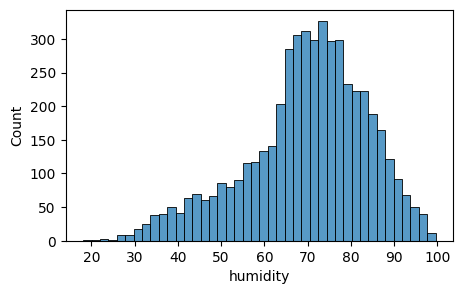

In [225]:
plt.close()
plt.figure(figsize=(5,3))
sns.histplot(df.humidity)
plt.show()

<Axes: xlabel='cloudcover', ylabel='solarradiation'>

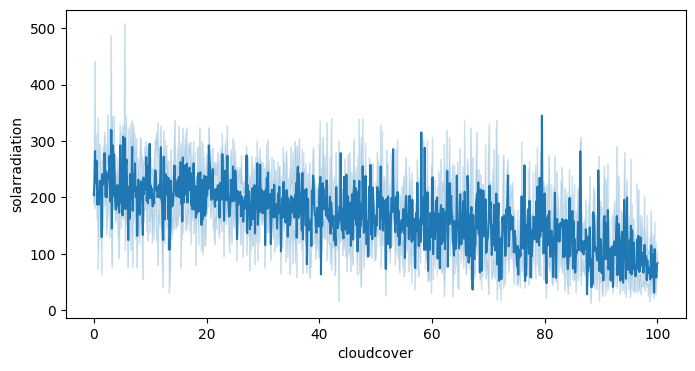

In [230]:
# draw regplot
#'''Date', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
 #      'feelslike', 'dew', 'humidity', 'precip', 'precipcover', 'preciptype',
  #     'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
   #    'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
    #   'sunrise', 'sunset', 'moonphase', 'conditions'''
plt.close()
plt.figure(figsize=(8,4))
sns.lineplot(x = "cloudcover",
            y = "solarradiation",
            data = weather_data)

<Axes: xlabel='cloudcover', ylabel='solarenergy'>

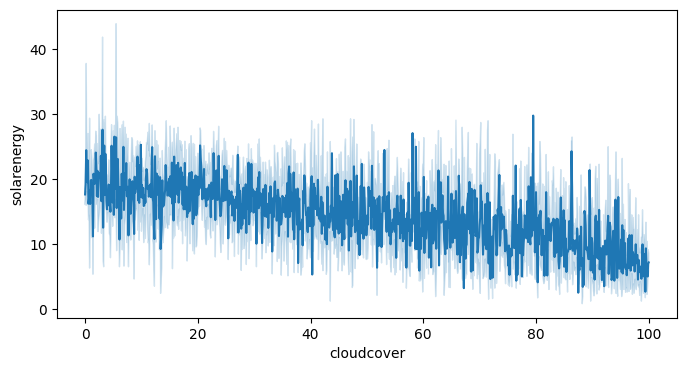

In [231]:
# draw regplot
#'''Date', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
 #      'feelslike', 'dew', 'humidity', 'precip', 'precipcover', 'preciptype',
  #     'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
   #    'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
    #   'sunrise', 'sunset', 'moonphase', 'conditions'''
plt.close()
plt.figure(figsize=(8,4))
sns.lineplot(x = "cloudcover",
            y = "solarenergy",
            data = weather_data)

<Axes: xlabel='cloudcover', ylabel='solarenergy'>

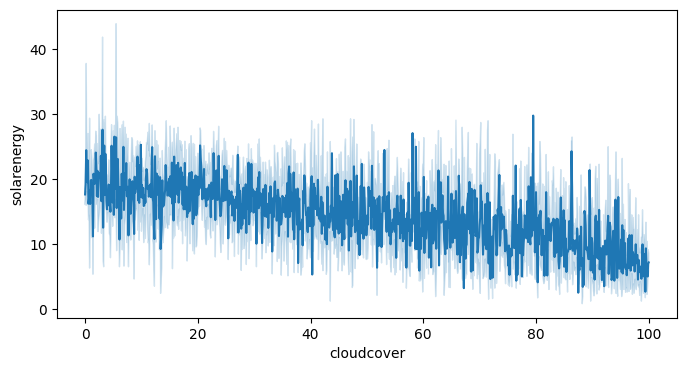

In [231]:
# draw regplot
#'''Date', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
 #      'feelslike', 'dew', 'humidity', 'precip', 'precipcover', 'preciptype',
  #     'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
   #    'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
    #   'sunrise', 'sunset', 'moonphase', 'conditions'''
plt.close()
plt.figure(figsize=(8,4))
sns.lineplot(x = "cloudcover",
            y = "solarenergy",
            data = weather_data)

In [232]:
weather_data.columns

Index(['Date', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipcover', 'preciptype',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'sunrise', 'sunset', 'moonphase', 'conditions', 'daylength'],
      dtype='object')

In [314]:
Cdata.columns

Index(['Date', 'Occurrence Hour', 'Offense Count', 'Beat', 'Premise',
       'Street Name', 'Street Type', 'NIBRS DescriptionOrg', 'Offense Code',
       'Crime Against', 'Offense Category'],
      dtype='object')

In [234]:
weather_data.shape

(4991, 27)

In [315]:
# Merging Data with crime
data=pd.merge(Cdata, weather_data, how="inner", on="Date")

In [319]:
data.rename(columns={'NIBRS DescriptionOrg':'NIBRS Description'},inplace=True)

In [320]:
data.head()

,Date,Occurrence Hour,Offense Count,Beat,Premise,Street Name,Street Type,NIBRS Description,Offense Code,Crime Against,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,conditions,Daylight(hr)
0,2010-01-01,8.0,1.0,3B10,20R,POINCIANA,DR,Theft,23H,Property,...,359.3,1028.0,47.7,9.8,174.8,15.0,7.0,0.53,Partially cloudy,10.273611
1,2010-01-01,18.0,1.0,5F20,20D,HAMMERLY,Unknown,Theft,23H,Property,...,359.3,1028.0,47.7,9.8,174.8,15.0,7.0,0.53,Partially cloudy,10.273611
2,2010-01-01,0.0,1.0,1A10,05O,MAIN,ST,Burglary,220,Property,...,359.3,1028.0,47.7,9.8,174.8,15.0,7.0,0.53,Partially cloudy,10.273611
3,2010-01-01,0.0,1.0,7C10,20R,LOCKWOOD,DR,Theft,23H,Property,...,359.3,1028.0,47.7,9.8,174.8,15.0,7.0,0.53,Partially cloudy,10.273611
4,2010-01-01,10.0,1.0,18F20,18A,MCCUE,RD,Theft,23H,Property,...,359.3,1028.0,47.7,9.8,174.8,15.0,7.0,0.53,Partially cloudy,10.273611


In [321]:
data.isnull().mean()*100

Date                 0.0
Occurrence Hour      0.0
Offense Count        0.0
Beat                 0.0
Premise              0.0
Street Name          0.0
Street Type          0.0
NIBRS Description    0.0
Offense Code         0.0
Crime Against        0.0
Offense Category     0.0
tempmax              0.0
tempmin              0.0
temp                 0.0
feelslikemax         0.0
feelslikemin         0.0
feelslike            0.0
dew                  0.0
humidity             0.0
precip               0.0
precipcover          0.0
preciptype           0.0
snowdepth            0.0
windgust             0.0
windspeed            0.0
winddir              0.0
sealevelpressure     0.0
cloudcover           0.0
visibility           0.0
solarradiation       0.0
solarenergy          0.0
uvindex              0.0
moonphase            0.0
conditions           0.0
Daylight(hr)         0.0
dtype: float64

In [322]:
# data is nice and clean lets save it 

data.to_csv("CWData.csv",index=False)

In [ ]:
plt.close()
sns.scatterplot(x="temp",y='Offense Count',data=data,hue='NIBRS Description')

<Axes: xlabel='temp', ylabel='Offense Count'>

Error in callback <function _draw_all_if_interactive at 0x00000235590E2480> (for post_execute):


KeyboardInterrupt: 